# **Digits Recoginizer using Keras for Begineers - 0.98 Accuracy**

## **Hello Everyone!**

This is my first Neural Network Notebook. 

You may also call MNIST, **Hello World!** of Deep Learning.

In this I have learn how to apply Multi Layer Neural Network for Multo Class Classification. 

And I think that it would be very benificial to all of you wh are beginneer in Deep Learning.

# About the Dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.




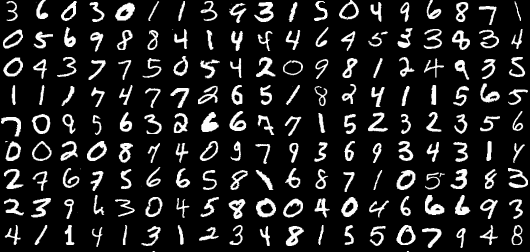


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

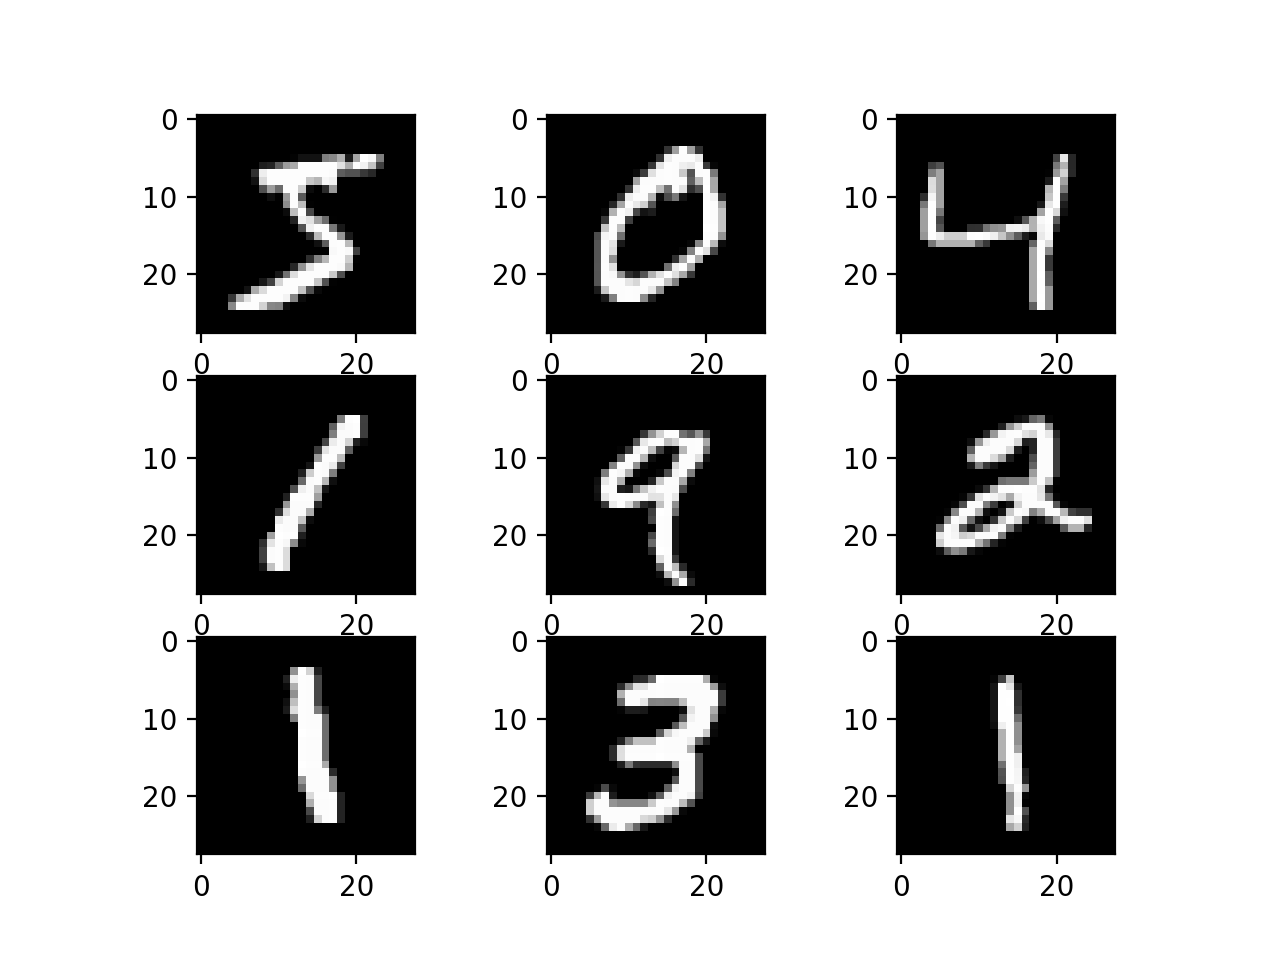

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


# Import Necessary Packages

Here we will import all the necessary packages which we will require in to solve these problem. 

>#### Here is the brief introduction about all the packages from their documentation page.

> **Keras** is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. 

> **Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.

>**Matplotlib** produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.

>**NumPy** is the fundamental package for array computing with Python.

>**sklearn** Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

>**Seaborn** ta visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Now we will store **train.csv** and **test.csv** in their respective format using pandas.read_csv function

In [3]:
Train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
Test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
Train_data.shape

(42000, 785)

Our Training data consist of 42000 rows and 785 columns.

In [5]:
Train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the above dataframe, among the 785 columns, 1st columns is for the **Label** which is our **target** or our class.

Now we will split our dataset in Features(X) and Target(y).

In [6]:
X=Train_data.drop('label',axis=1).values
y=Train_data['label'].values

In [7]:
X.shape

(42000, 784)

In [8]:
test = Test_data.values

# Normalize the Data

### Two Questions arise here:

1. Why do we need to normalize our Data ?

2. Why do we need to divide by 255 to normalize the Data ?

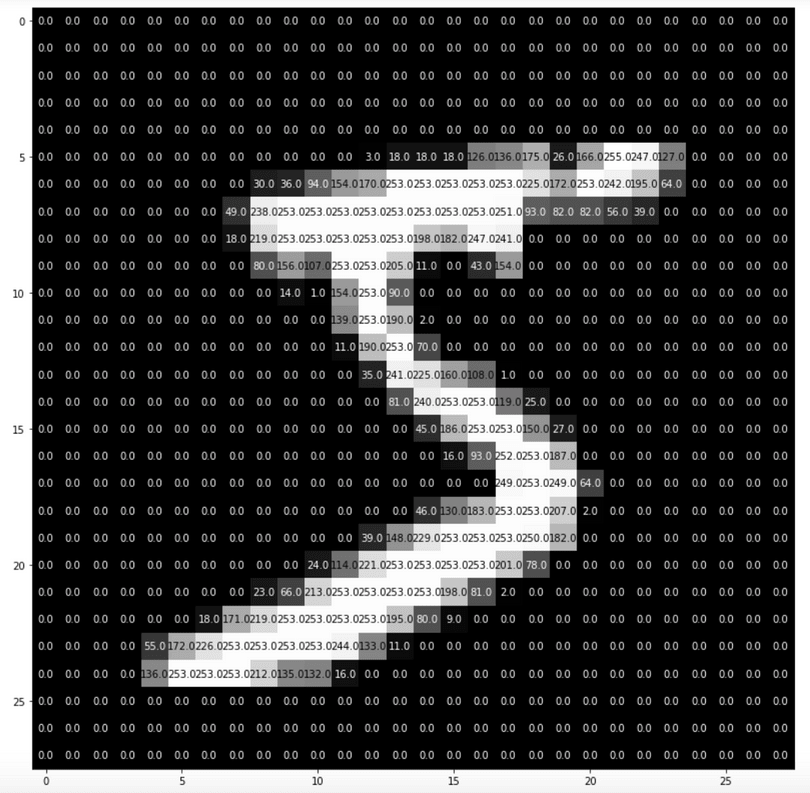


As we can see in the above image that each image is of 28x28 pixels. 

Lets consider a table of 28x28 cells i.e. total of 784 cells. And each cell contains some value between 0 - 255. 

If the value is **0** - then its **'black'**

If the value is **255** - then its **'white'**

And if its between 0-255 then it will be **'gray'** with respect to its value as it shows intensity.

Range 0f 0-255 is quite large and if we can bring all the values between 0 to 1 then our model will work more efficiently.

So we need to divide each value by 255 which will give us value between 0 to 1.

In [9]:
X=X/255
test=test/255

# Split the Data

Now we will import train_test_split module from sklearn.model_selection library which will help us in spliting our dataset in Training data and Testing data.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

We can see that our data is split in Train and testing. We will train our model using X_train and test our model on X_test. Spliting also helps in evaluating our model better.

In [11]:
print(X_train.shape)
print(X_test.shape)

(29400, 784)
(12600, 784)


# Reshape the Data

We will reshape our data so we can plot it.

-1 means the reshape function automatically computer the first parameter, and as our images are in 784(28x28) pixels, so we will reshape it to matirx of 28x28

In [12]:
X_train  = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

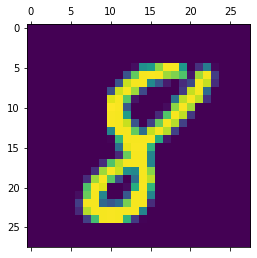

In [13]:
plt.matshow(X_train[0])

label which represent this image is 7.

In [14]:
y_train[0]

8

# Neural Network Model

Now from here our Neural Network part starts.

We will import Sequential model from Keras.models library.

And import Flatten, Dense, Activation Layer
   * Flatten is used to flatten a matrix to a 1D-Array
   * Dense is used to add hidden layers and output layers
   * Activation is used to add and activation to model. Some popular activation are: Sigmoid, Relu, Softmax
   
You can learn more by going through the keras documentation site: https://keras.io/

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


We can you use model.summary() funtion to view the summary of our model.

* The first Layer is the Input Layer which includes 784 nodes.
* The second Layer is the hidden layer of 256 nodes. 
* The last layer is the output layer of 10, which classifies all the numbers from 0-9.

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

We will use Cross Entropy ti calculate Loss, optimizer - 'adam' and metrics as 'accuracy'.

You can learn more about the parameters on the documentation page.

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Training our model

We will fit our model to X_train and y_train datasets to train our model.

Epochs are the number of iterations to be performed to train our model.

In [18]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
29400/29400 [==============================] - 3s 112us/step - loss: 0.2961 - accuracy: 0.9156
Epoch 2/50
29400/29400 [==============================] - 3s 98us/step - loss: 0.1263 - accuracy: 0.9628
Epoch 3/50
29400/29400 [==============================] - 3s 98us/step - loss: 0.0808 - accuracy: 0.9755
Epoch 4/50
29400/29400 [==============================] - 3s 100us/step - loss: 0.0592 - accuracy: 0.9820
Epoch 5/50
29400/29400 [==============================] - 3s 108us/step - loss: 0.0421 - accuracy: 0.9870
Epoch 6/50
29400/29400 [==============================] - 3s 119us/step - loss: 0.0312 - accuracy: 0.9910
Epoch 7/50
29400/29400 [==============================] - 3s 107us/step - loss: 0.0227 - accuracy: 0.9931
Epoch 8/50
29400/29400 [==============================] - 3s 103us/step - loss: 0.0183 - accuracy: 0.9943
Epoch 9/50
29400/29400 [==============================] - 3s 100us/step - loss: 0.0157 - accuracy: 0.9950
Epoch 10/50
29400/29400 [=======================

![](http://im.ezgif.com/tmp/ezgif-1-6bce8ddc963c.jpg)

# Evaluating our model

We will evaluate this model on our splitted test data. 

model.evaluate() function will return two values.
* Loss value
* metrics value i.e. Accuracy

In [19]:
model.evaluate(X_test,y_test)

12600/12600 [==============================] - 0s 39us/step


[0.15587646918283302, 0.9751587510108948]

# Predicitng from model
Now we will predict our output for our X_test data using our trained model.

In [21]:
test=test.reshape(-1,28,28)

In [22]:
yp=model.predict(test)

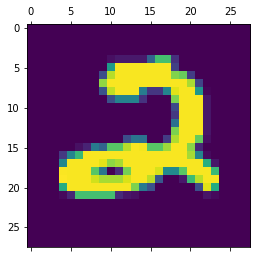

In [29]:
plt.matshow(test[0])

The first image in our test dataset is 2.

In [28]:
yp[0]

array([1.5988855e-23, 1.2357527e-25, 1.0000000e+00, 1.5474107e-18,
       2.4854827e-27, 6.3242055e-28, 1.7955438e-23, 2.3337526e-14,
       8.7306649e-19, 2.8427120e-29], dtype=float32)

In our yp i.e. predictions, we get an array as an output for a row of features from X_test.

The array represents the probabilites for each label and we can see in the above output that at index=2 we got the maximum probability.

So for the first image it predicts 2, which is absolutely correct.

In [23]:
y_pred=np.argmax(yp, axis=1)

But for each image we get probabilites for each label. We can simplify this by using the np.argmax() function which represent the highest probability for the test image and thus, classify the image.

In [24]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

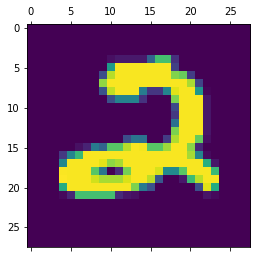

In [25]:
plt.matshow(test[0])

In [26]:
y_pred[0]

2

# Classification Matrix

Here we are using just above splitted test data (which we splitted using train_test_split) to create a confusion matrix to visulalise results of our model.

In [35]:
ypredictions = model.predict(X_test)
ypredictions=np.argmax(ypredictions, axis=1)

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypredictions,ann)
print(cm)

[[1238    0    3    1    0    0    4    1    0    0]
 [   0 1382    2    1    1    0    1    3    4    1]
 [   1    2 1229    5    5    0    5    5    5    0]
 [   1    1    6 1281    1   15    0    3    5    8]
 [   1    3    1    0 1204    1    3    5    0   14]
 [   4    1    1   11    1 1079    7    1    2    4]
 [   5    0    3    0    5    3 1242    0    0    0]
 [   0    0    7    9    4    1    0 1261    0    3]
 [   4    9    5   22    4    8    6    5 1175   11]
 [   6    0    0    7   12    5    1   17    1 1196]]


The matrix shows the Predicted Label on X-axis and True label on Y-axis.

Text(0.5, 51.0, 'Predicted label')

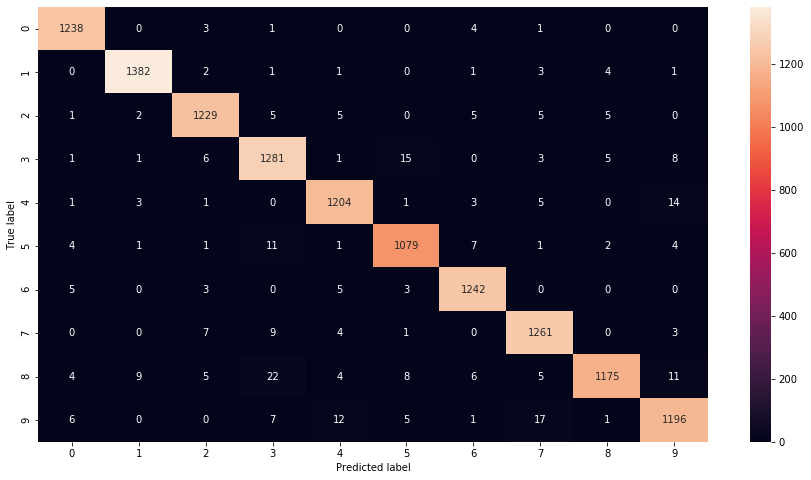

In [46]:
import seaborn as sns
plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

If we focus on value=12 in the last row. 

We can interpret from this figure that 12 times our model predicted 9 as 4.

And if we see all bright cells.

1st cell indicate value=1238 which means 1238 times our model predicted 0 as 0.

# Submiting our output

We will submit our submission csv file using pandas.to_csv() function.

In [47]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [48]:
sub['Label']=y_pred
#sub.to_csv("Submission.csv",index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


### **Finally, we have built our Neural Network model which classifies the hand-written images.**

## *Thank you!* for being with me till the end. Hope you liked the notebook. 

## Please upvote👍 this notebook as it motivates me to play with more datasets and share with you all.